In [76]:
import pandas as pd

url = "https://raw.githubusercontent.com/5rovic/tar-project/main/code/data/essays.csv"
df = pd.read_csv(url, encoding="cp1252")

In [77]:
traits = {'cEXT': 'extraversion',
          'cNEU': 'neuroticism',
          'cAGR': 'agreeableness',
          'cCON': 'conscientiousness',
          'cOPN': 'openness'
          }

In [78]:
mapping = {'y': 1, 'n': 0}

df[['cEXT','cNEU','cAGR','cCON','cOPN']] = df[['cEXT','cNEU','cAGR','cCON','cOPN']].replace(mapping)

df.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,1997_568848.txt,I can't believe it! It's really happening! M...,1,0,1,1,0
4,1997_688160.txt,"Well, here I go with the good old stream of co...",1,0,1,0,1


In [79]:
X = df['TEXT']
y = df.iloc[:, 2:]

In [81]:
from sklearn.model_selection import train_test_split

X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, train_size=0.89, random_state=42)

print(len(X_train), len(X_val), len(X_test))
print(len(y_train), len(y_val), len(y_test))

1975 245 247
1975 245 247


In [82]:
y_train.head()

,cEXT,cNEU,cAGR,cCON,cOPN
331,1,0,0,0,1
1372,1,0,1,1,0
2093,0,1,0,0,1
1705,1,0,0,0,1
496,0,0,0,0,0


<Axes: >

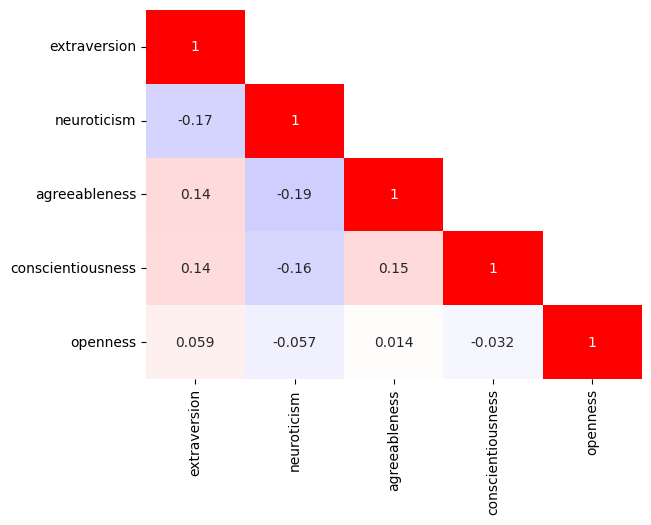

In [83]:
# KORELACIJSKA MATRICA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = y_train.corr().to_numpy()
mask = np.logical_xor(np.tril(np.ones_like(corr, dtype=bool)), np.diag(np.ones_like(corr, dtype=bool)))
labels = list(traits.values())
# sns.heatmap(corr[:-1, 1:], annot=True, cmap='bwr', mask=mask[:-1, 1:], cbar=False, xticklabels=labels[1:], yticklabels=labels[:-1])
sns.heatmap(corr, annot=True, cmap='bwr', vmin=-1, vmax=1, mask=mask, cbar=False, xticklabels=labels, yticklabels=labels)

extraversion         0.509873
neuroticism          0.499241
agreeableness        0.531646
conscientiousness    0.497722
openness             0.517468
dtype: float64


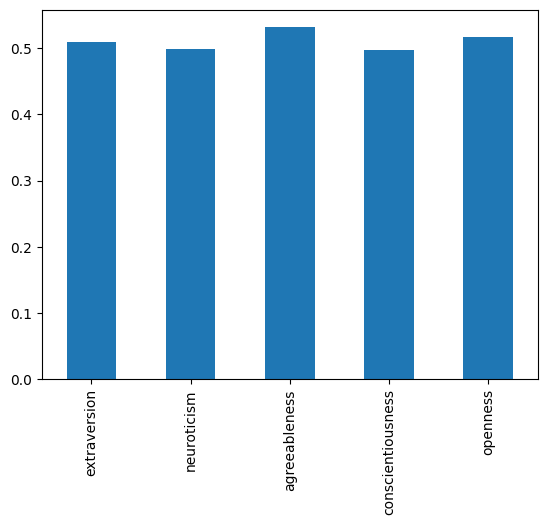

In [84]:
# ZASTUPLJENOST TRAITA

label_counts = y_train.sum(axis=0)
label_counts.rename(traits, inplace=True)
label_percentages = label_counts / len(y_train)
print(label_percentages)
ax = label_percentages.plot.bar()

0     49
1    281
2    623
3    621
4    347
5     54
dtype: int64


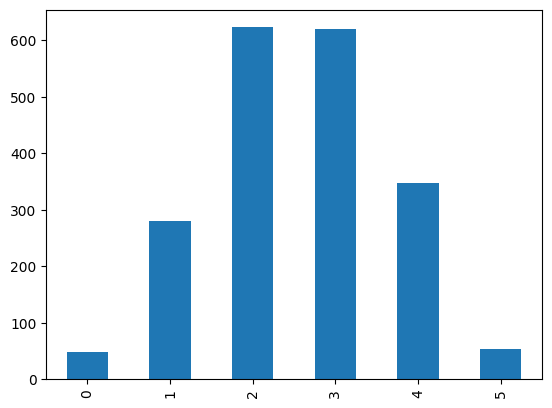

In [85]:
# KOLIKO PRIMJERA IMA S ODREDJENIM BROJEM TRAITOVA

traits_per_example = y_train.sum(axis=1)
how_many_traits = traits_per_example.value_counts().sort_index()
print(how_many_traits)
ax = how_many_traits.plot.bar()

number of trait combinations represented in the training set: 32
number of all possible trait combinations: 32

5 most common personality trait combinations:
154 ['extraversion' 'agreeableness' 'conscientiousness' 'openness']
117 ['neuroticism']
112 ['neuroticism' 'openness']
108 ['extraversion' 'agreeableness' 'conscientiousness']
71 ['extraversion' 'agreeableness' 'openness']

5 least common personality trait combinations:
40 ['extraversion' 'neuroticism' 'conscientiousness']
38 ['conscientiousness' 'openness']
35 ['conscientiousness']
35 ['neuroticism' 'agreeableness' 'conscientiousness' 'openness']
34 ['extraversion']


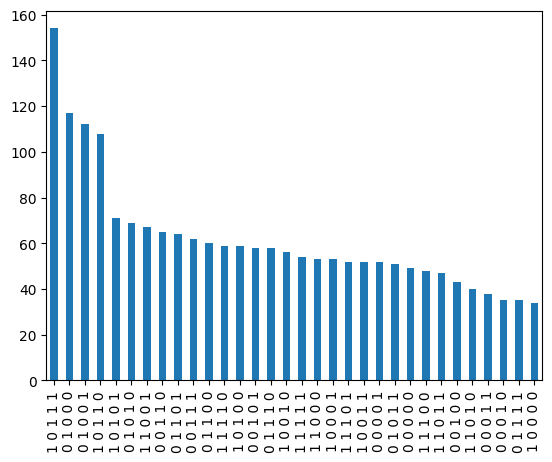

In [113]:
# KOLIKO SU CESTE ODREDJENE KOMBINACIJE TRAITOVA

merged_label = y_train[y_train.columns[:]].astype(str).apply(" ".join, axis=1)

trait_combo_frequency = merged_label.value_counts()
print("number of trait combinations represented in the training set:", len(trait_combo_frequency))
print("number of all possible trait combinations:", 2**5)

traits_array = np.array(list(traits.values()))

print()
print("5 most common personality trait combinations:")
for i, v in trait_combo_frequency.iloc[:5].items():
  mask = np.array([int(t) for t in i.split()], dtype=bool)
  print(v, traits_array[mask])

print()
print("5 least common personality trait combinations:")
for i, v in trait_combo_frequency.iloc[-5:].items():
  mask = np.array([int(t) for t in i.split()], dtype=bool)
  print(v, traits_array[mask])

ax = trait_combo_frequency.plot.bar()